In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
path = '/content/drive/MyDrive/최종프로젝트'

- Naver Clova API 사용(OD)

In [19]:
with open(f'{path}/소스/ClientID_OB.txt') as f:
  client_id = f.read()
len(client_id)

10

In [21]:
with open(f'{path}/소스/ClientSecret_OB.txt') as f:
  client_secret = f.read()
len(client_secret)

40

In [22]:
import os
import sys
import requests

url = "https://naveropenapi.apigw.ntruss.com/vision-obj/v1/detect" # 객체 인식
files = {'image': open(f'{path}/자료/dataset/seatbelt_sample.jpg', 'rb')}
headers = {'X-NCP-APIGW-API-KEY-ID': client_id, 'X-NCP-APIGW-API-KEY': client_secret }
response = requests.post(url,  files=files, headers=headers)
rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

{"predictions": [{"num_detections": 9, "detection_classes": [1.0, 4.0, 3.0, 3.0, 1.0, 3.0, 33.0, 3.0, 63.0], "detection_names": ["person", "motorcycle", "car", "car", "person", "car", "suitcase", "car", "couch"], "detection_scores": [0.990822, 0.763948, 0.681772, 0.546706, 0.540536, 0.497416, 0.413282, 0.413192, 0.370792], "detection_boxes": [[0.0162818, 0.117362, 0.940646, 0.632425], [0.229287, 0.29315, 0.949174, 0.953919], [0.0169504, 0.310044, 0.647729, 0.987568], [0.0574402, 0.229611, 0.93388, 1.0], [0.0753273, 0.202652, 0.945909, 0.839405], [0.293714, 0.807713, 0.995183, 1.0], [0.327464, 0.223933, 0.981767, 0.818674], [0.201126, 0.478101, 0.98811, 0.98635], [0.465429, 0.0, 0.996688, 0.40087]]}]}


In [47]:
import json
res = json.loads(response.text) # json에서 dictionary로 변환
res

{'predictions': [{'detection_boxes': [[0.0162818,
     0.117362,
     0.940646,
     0.632425],
    [0.229287, 0.29315, 0.949174, 0.953919],
    [0.0169504, 0.310044, 0.647729, 0.987568],
    [0.0574402, 0.229611, 0.93388, 1.0],
    [0.0753273, 0.202652, 0.945909, 0.839405],
    [0.293714, 0.807713, 0.995183, 1.0],
    [0.327464, 0.223933, 0.981767, 0.818674],
    [0.201126, 0.478101, 0.98811, 0.98635],
    [0.465429, 0.0, 0.996688, 0.40087]],
   'detection_classes': [1.0, 4.0, 3.0, 3.0, 1.0, 3.0, 33.0, 3.0, 63.0],
   'detection_names': ['person',
    'motorcycle',
    'car',
    'car',
    'person',
    'car',
    'suitcase',
    'car',
    'couch'],
   'detection_scores': [0.990822,
    0.763948,
    0.681772,
    0.546706,
    0.540536,
    0.497416,
    0.413282,
    0.413192,
    0.370792],
   'num_detections': 9}]}

In [55]:
loc = res['predictions'][0]['detection_boxes'][0] # [x,y,x+width,y+height], 상대위치
res['predictions'][0]['detection_boxes'][0]

[0.0162818, 0.117362, 0.940646, 0.632425]

- 위치 표시하기

In [58]:
# API 호출 변수 및 필요한 것들 import
import numpy as np
import os
import sys
import requests
from PIL import ImageDraw

In [63]:
# Object Detection 함수

def ObjectDetection(filename):
    # 1. 파일을 불러온 뒤 OD 결과 반환(response)
    files = {'image': open(filename, 'rb')}
    response = requests.post(url,  files=files, headers=headers)
    rescode = response.status_code
    if(rescode==200):
    # 2. 결과를 딕셔너리로 변환
        res_dict = eval(response.text)
        score = res_dict['predictions'][0]['detection_scores']  # 디텍션 점수중 제일 높은 것 찾기
        count = np.argmax(score)        # count = 제일 높은 점수의 위치
        coord = res_dict['predictions'][0]['detection_boxes'][count]    # 제일 높은 점수를 받은 객체의 좌표
        img = Image.open(filename)
        x = (coord[0] * img.size[0])
        y = (coord[1] * img.size[1])
        w = (coord[2] - coord[0]) * img.size[0]
        h = (coord[3] - coord[1]) * img.size[1]
        draw = ImageDraw.Draw(img)
        draw.line([(x,y), (x, y+h), (x+w, y+h), (x+w, y), (x,y)], fill="red", width=1)
    return(img)

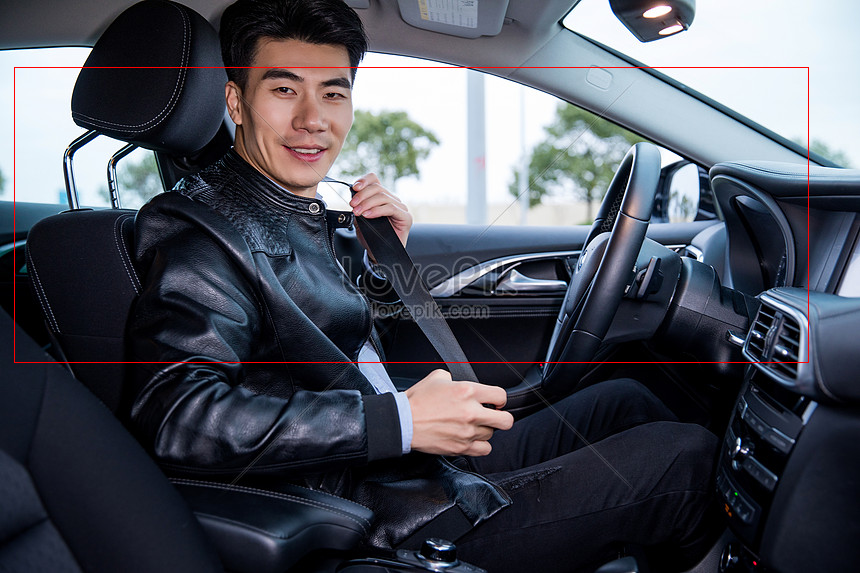

In [64]:
ObjectDetection(f'{path}/자료/dataset/seatbelt_sample.jpg')

- 이미지 자르기

In [72]:
from PIL import Image

def ObjectDetection_crop(filename):
    # 1. 파일을 불러온 뒤 OD 결과 반환(response)
    files = {'image': open(filename, 'rb')}
    response = requests.post(url,  files=files, headers=headers)
    rescode = response.status_code
    if(rescode==200):
    # 2. 결과를 딕셔너리로 변환
        res_dict = eval(response.text)
        score = res_dict['predictions'][0]['detection_scores']  # 디텍션 점수중 제일 높은 것 찾기
        count = np.argmax(score)        # count = 제일 높은 점수의 위치
        coord = res_dict['predictions'][0]['detection_boxes'][count]    # 제일 높은 점수를 받은 객체의 좌표
        img = Image.open(filename)
        x = (coord[0] * img.size[0])
        y = (coord[1] * img.size[1])
        w = (coord[2] - coord[0]) * img.size[0]
        h = (coord[3] - coord[1]) * img.size[1]
        croppedImage=image1.crop((x,y,x+w,y+h)) # 이미지 자르기 crop함수 이용, (start_x, start_y, start_x + width, start_y + height) 
    return(croppedImage)

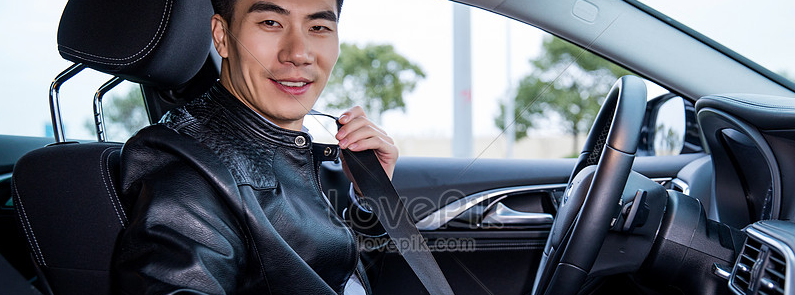

In [73]:
ObjectDetection_crop(f'{path}/자료/dataset/seatbelt_sample.jpg')

- zip파일 압축 풀기

In [74]:
import os, shutil, zipfile
local_zip = '/content/drive/MyDrive/최종프로젝트/자료/dataset/imgs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [91]:
from glob import glob # 폴더/파일 목록 확인
folderList = glob('./train/c0/*')

In [93]:
len(folderList)

2489

In [92]:
# npz 자료제작
# X=[];

# for i in range(len(folderList)):
#     img = Image.open(folderList[i])
#     crop_img = ObjectDetection_crop(img)
#     img = crop_img.resize((100,100)) # 각 이미지의 크기가 다르면 다같이 학습시킬 수 없으므로 크기 맞추기!
#     imgarr=np.array(img)
#     X.append(imgarr)